In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [631]:
coaches = pd.read_csv('combined.csv')

In [574]:
ly=coaches.groupby(['name','level']).agg({'year':'count'})
ly_piv=ly.reset_index().pivot(index = 'name',columns = 'level',values='year')[['Coordinator','Head','Positional']]

In [575]:
level_record = coaches[['name','level']].drop_duplicates()
level_record_only = (coaches.groupby(['name','level']).agg(sum).win/
                      (coaches.groupby(['name','level']).agg(sum).win + 
                       coaches.groupby(['name','level']).agg(sum).loss)).to_frame(name='wl')
lp = pd.merge(level_record,level_record_only,how='left',on = ['name','level'])
lp_pivot = lp.pivot(index='name',columns='level',values='wl')[['Coordinator','Head','Positional']]

In [576]:
lyp = pd.merge(ly,lp,how='inner',on = ['name','level'])
lyp_piv = lyp.pivot(index = 'name', columns = 'level')

In [577]:
byyr = (coaches.groupby(['year','phase']).agg({'name':'count'}).name/coaches.groupby('year').agg({'team':'nunique'}).team).to_frame(name='avg coaches').reset_index()
byyr_piv = byyr.pivot(index='year',columns = 'phase')['avg coaches'][['Defense','Offense','Special Teams']]

In [ ]:
head_g = coaches[coaches.level == 'Head'].groupby(['name','team','level'])
head_wl = head_g.agg({'year':'count','win':'sum','loss':'sum'})
head3_ct = head_wl.loc[head_wl.year>2]
head3_ct['wl']=head_wl.win/(head_wl.win+head_wl.loss)
head3_ct = head3_ct.reset_index().rename(columns = {'year':'season'})[['name','team','wl','season']]
head3_yr = coaches[coaches.level =='Head'].groupby(['name','team','level']).agg({'year':'min'}).reset_index().rename(columns={'year':'debut'})
head3 = pd.merge(head3_ct,head3_yr,how = 'inner',on = ['name','team'])


In [ ]:
past3_m = pd.merge(head3,coaches,how='inner',on='name',suffixes=('_h','_p'))
past3_m = past3_m.loc[(past3_m.year<past3_m.debut) & (past3_m.year>past3_m.debut-4)].sort_values('year')
past3 = past3_m.groupby(['name','team_h','debut']).agg({'win':'sum','loss':'sum','position':'first',
                                                        'phase':'first','level_p':'first','team_p':'first'})
past3['wl_p']=past3.win/(past3.win+past3.loss)
past3 = past3.reset_index().rename(columns={'team_h':'team'}).drop(columns=['win','loss'])
hp3 = pd.merge(head3,past3,how='right',on=['name','team','debut'])

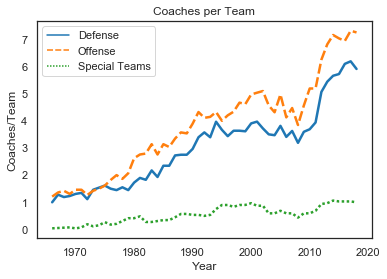

In [578]:
no_coach = sns.lineplot(data=byyr_piv, palette="tab10", linewidth=2.5)
no_coach.set(xlabel='Year', ylabel='Coaches/Team')
no_coach.set_title('Coaches per Team')
plt.show()

In [579]:
lyp.groupby('level').agg({'year':['mean','median'],'wl':['mean','median']})

year               wl          
                 mean median      mean    median
level                                           
Coordinator  3.793750      2  0.486413  0.484375
Head         5.055328      3  0.454695  0.468354
Positional   5.923874      4  0.481948  0.488543

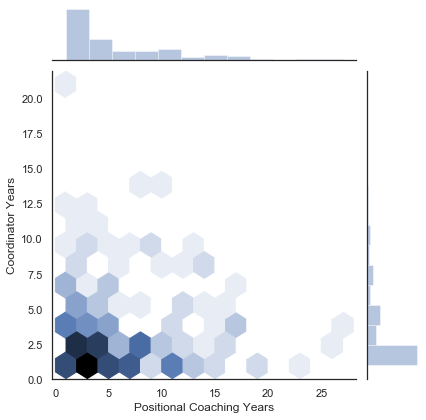

In [580]:
cvp_yr = sns.jointplot(x='Positional', y='Coordinator', data= ly_piv, kind = 'hexa')
cvp_yr.set_axis_labels(xlabel='Positional Coaching Years', ylabel='Coordinator Years')
plt.show()

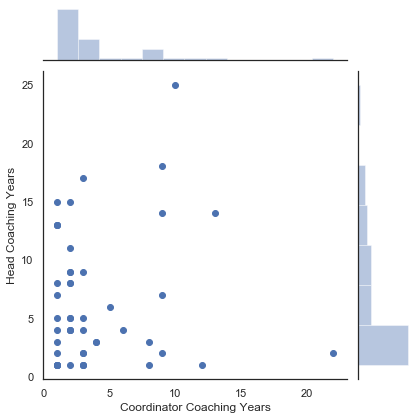

In [581]:
hvc_yr = sns.jointplot(x='Coordinator', y='Head', data= ly_piv)
hvc_yr.set_axis_labels(xlabel='Coordinator Coaching Years', ylabel='Head Coaching Years')
plt.show()

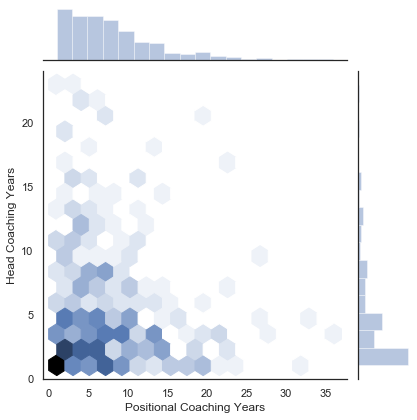

In [582]:
hvp_yr = sns.jointplot(x='Positional', y='Head', data= ly_piv, kind = 'hexa')
hvp_yr.set_axis_labels(xlabel = 'Positional Coaching Years', ylabel='Head Coaching Years')
plt.show()

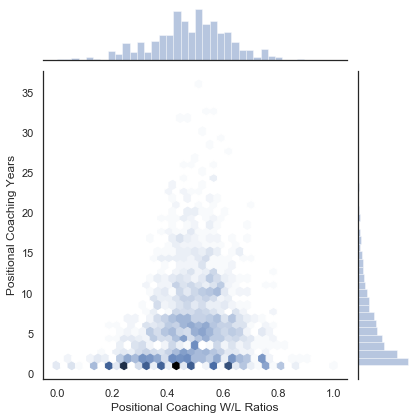

In [583]:
wvy_pp = sns.jointplot(x=lyp_piv.wl.Positional, y=lyp_piv.year.Positional, kind = 'hexa')
wvy_pp.set_axis_labels(xlabel = 'Positional Coaching W/L Ratios', ylabel='Positional Coaching Years')
plt.show()

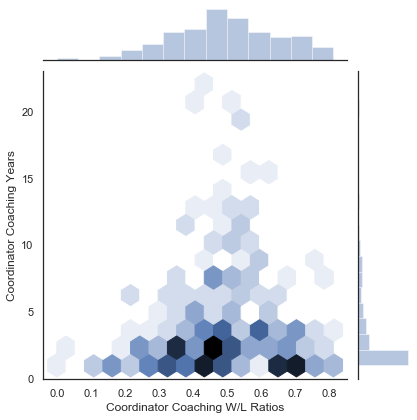

In [584]:
wvy_cc = sns.jointplot(x=lyp_piv.wl.Coordinator, y=lyp_piv.year.Coordinator, kind = 'hexa')
wvy_cc.set_axis_labels(xlabel = 'Coordinator Coaching W/L Ratios', ylabel='Coordinator Coaching Years')
plt.show()

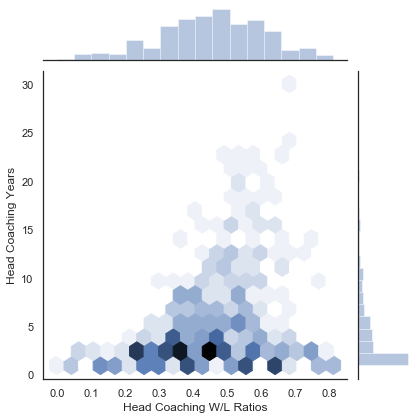

In [585]:
wvy_hh = sns.jointplot(x=lyp_piv.wl.Head, y=lyp_piv.year.Head, kind = 'hexa')
wvy_hh.set_axis_labels(xlabel = 'Head Coaching W/L Ratios', ylabel='Head Coaching Years')
plt.show()

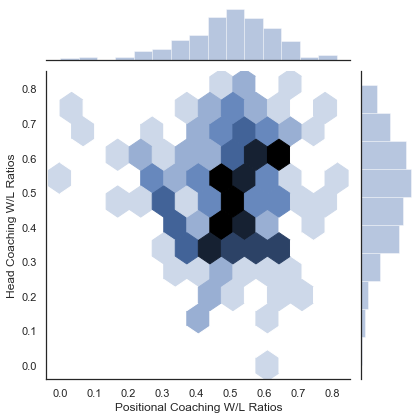

In [586]:
cvp_wl = sns.jointplot(x='Positional', y='Coordinator', data= lp_pivot,kind = 'hexa')
cvp_wl.set_axis_labels(xlabel = 'Positional Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

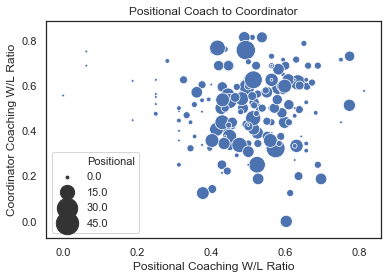

In [587]:
cvp_yrwl = sns.scatterplot(x = lyp_piv.wl.Positional, y=lyp_piv.wl.Coordinator, size=lyp_piv.year.Positional, sizes = (8,500))
cvp_yrwl.set(xlabel='Positional Coaching W/L Ratio', ylabel='Coordinator Coaching W/L Ratio')
cvp_yrwl.set_title('Positional Coach to Coordinator')
plt.show()

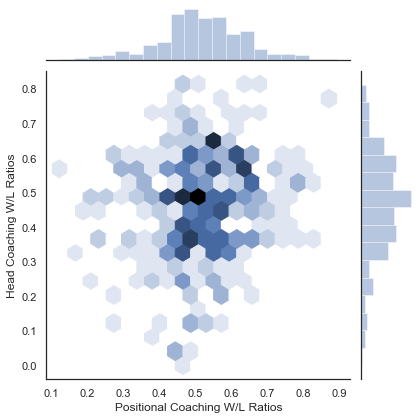

In [588]:
pvc_wl = sns.jointplot(x='Positional', y='Head', data= lp_pivot,kind = 'hexa')
pvc_wl.set_axis_labels(xlabel = 'Positional Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

In [668]:
len(head3)

341

In [669]:
len(hp3)

191

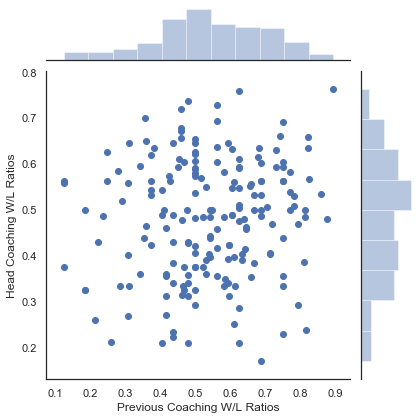

In [663]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3)
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

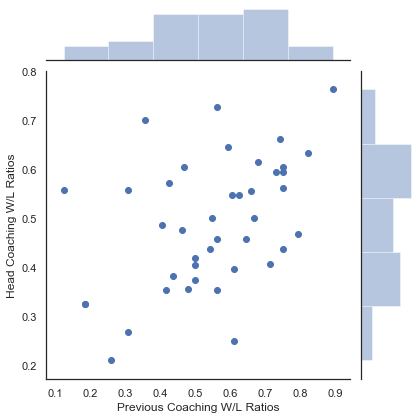

In [664]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3.loc[hp3.team==hp3.team_p])
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()

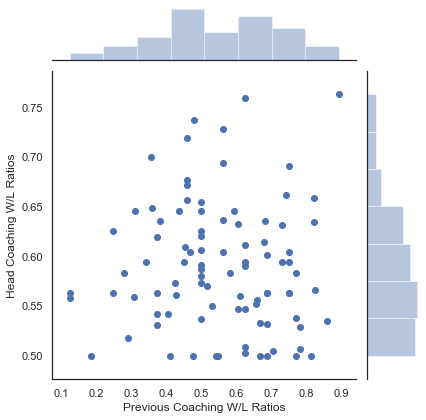

In [667]:
hp3_wl = sns.jointplot(x='wl_p', y='wl', data= hp3.loc[hp3.wl>=0.5])
hp3_wl.set_axis_labels(xlabel = 'Previous Coaching W/L Ratios', ylabel='Head Coaching W/L Ratios')
plt.show()